In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

In [3]:
cols_to_split = [
{
    "name": "third_downs",
    "first_split": "third_down_conv",
    "second_split": "third_down_attempt"
},
{
    "name": "fourth_downs",
    "first_split": "fourth_down_conv",
    "second_split": "fourth_down_attempt"
},
{
    "name": "sacks",
    "first_split": "sacks",
    "second_split": "sack_yards"
},
{
    "name": "comp_att",
    "first_split": "pass_comp",
    "second_split": "pass_attempt"
},
{
    "name": "penalties",
    "first_split": "penalties",
    "second_split": "penalty_yards"
},
{
    "name": "redzone",
    "first_split": "redzone_conv",
    "second_split": "redzone_attempt"
},
]

In [4]:
df = pd.read_csv("./data_sets/nfl_team_stats_2002-2022.csv")
pd.set_option('display.max_columns', 70)

df['date']= pd.to_datetime(df['date'])
df['year'] = np.where(df['date'].dt.month > 2 ,df['date'].dt.year, df['date'].dt.year - 1).astype(str)
df['won'] = np.where(df['score_away'] < df['score_home'], "home", "away")

def split_df(old_df, team, opp):
    new_df = old_df.copy()
    new_df['des'] = team
    new_df['won'] = new_df['won'] == new_df['des']
    new_df.columns = new_df.columns.str.replace(f'_{team}', '').str.replace(f'_{opp}', '_opp')
    return new_df.rename(columns={team: "team", opp: "opp"})

def split_col(col, df, suffix):
    name = f"{col['name']}{suffix}"
    first_split = f"{col['first_split']}{suffix}"
    second_split = f"{col['second_split']}{suffix}"

    split = df[name].str.split("-", expand = True)
    df = df.drop(name, axis=1)
    df[first_split] = split[0].astype(int)
    df[second_split] = split[1].astype(int)
    return df

df_away = split_df(df, "away", "home")
df_home = split_df(df, "home", "away")

df = pd.concat([df_away, df_home]).sort_values("date").reset_index(drop=True)

for col in cols_to_split:
   df = split_col(col, df, "")
   df = split_col(col, df, "_opp")

df['possession'] = pd.to_timedelta('00:' +df['possession']).dt.total_seconds()/60
df['possession_opp'] = pd.to_timedelta('00:' +df['possession_opp']).dt.total_seconds()/60

df['total_yards'] = df['passing_yards'] + df['rushing_yards'] - df['sack_yards']

df = df.drop(['opp', 'date', 'des', 'redzone_conv', 'redzone_attempt', "redzone_conv_opp", "redzone_attempt_opp"], axis=1)

weekly_stats_df = df.copy()
yearly_stats_df = df.groupby(['team', 'year']).mean().reset_index()

In [5]:
yearly_stats_df.shape

(672, 47)

In [6]:
yearly_stats_df.dtypes

team                        object
year                        object
first_downs                float64
first_downs_opp            float64
passing_yards              float64
passing_yards_opp          float64
rushing_yards              float64
rushing_yards_opp          float64
total_yards                float64
total_yards_opp            float64
rushing_attempts           float64
rushing_attempts_opp       float64
fumbles                    float64
fumbles_opp                float64
int                        float64
int_opp                    float64
turnovers                  float64
turnovers_opp              float64
drives                     float64
drives_opp                 float64
def_st_td                  float64
def_st_td_opp              float64
possession                 float64
possession_opp             float64
score                      float64
score_opp                  float64
won                        float64
third_down_conv            float64
third_down_attempt  

In [7]:
yearly_stats_df.columns

Index(['team', 'year', 'first_downs', 'first_downs_opp', 'passing_yards',
       'passing_yards_opp', 'rushing_yards', 'rushing_yards_opp',
       'total_yards', 'total_yards_opp', 'rushing_attempts',
       'rushing_attempts_opp', 'fumbles', 'fumbles_opp', 'int', 'int_opp',
       'turnovers', 'turnovers_opp', 'drives', 'drives_opp', 'def_st_td',
       'def_st_td_opp', 'possession', 'possession_opp', 'score', 'score_opp',
       'won', 'third_down_conv', 'third_down_attempt', 'third_down_conv_opp',
       'third_down_attempt_opp', 'fourth_down_conv', 'fourth_down_attempt',
       'fourth_down_conv_opp', 'fourth_down_attempt_opp', 'sacks',
       'sack_yards', 'sacks_opp', 'sack_yards_opp', 'pass_comp',
       'pass_attempt', 'pass_comp_opp', 'pass_attempt_opp', 'penalties',
       'penalty_yards', 'penalties_opp', 'penalty_yards_opp'],
      dtype='object')

In [8]:
yearly_stats_df.isna().sum()

team                       0
year                       0
first_downs                0
first_downs_opp            0
passing_yards              0
passing_yards_opp          0
rushing_yards              0
rushing_yards_opp          0
total_yards                0
total_yards_opp            0
rushing_attempts           0
rushing_attempts_opp       0
fumbles                    0
fumbles_opp                0
int                        0
int_opp                    0
turnovers                  0
turnovers_opp              0
drives                     0
drives_opp                 0
def_st_td                  0
def_st_td_opp              0
possession                 0
possession_opp             0
score                      0
score_opp                  0
won                        0
third_down_conv            0
third_down_attempt         0
third_down_conv_opp        0
third_down_attempt_opp     0
fourth_down_conv           0
fourth_down_attempt        0
fourth_down_conv_opp       0
fourth_down_at

In [9]:
yearly_stats_df.describe()

,first_downs,first_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,won,third_down_conv,third_down_attempt,third_down_conv_opp,third_down_attempt_opp,fourth_down_conv,fourth_down_attempt,fourth_down_conv_opp,fourth_down_attempt_opp,sacks,sack_yards,sacks_opp,sack_yards_opp,pass_comp,pass_attempt,pass_comp_opp,pass_attempt_opp,penalties,penalty_yards,penalties_opp,penalty_yards_opp
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,19.443041,19.519170,223.767615,224.513046,114.127538,114.808547,322.906373,339.321593,27.083257,27.216814,0.634947,0.629985,0.927166,0.915714,1.562113,1.545699,12.190990,12.187308,0.325992,0.331189,30.187103,30.248402,22.119866,22.363080,0.491877,5.138582,13.213793,5.158396,13.208490,0.511153,1.027687,0.506970,1.014044,2.299144,14.988780,2.277612,14.832563,20.953158,33.959685,20.960005,33.902664,6.297311,52.669908,6.289638,52.626059
std,2.343752,1.842812,38.209372,26.272720,20.824494,18.600500,40.270734,31.585361,3.126870,2.770325,0.221562,0.214743,0.293604,0.296717,0.411726,0.401851,1.544512,1.533258,0.215786,0.222693,1.500998,1.505327,4.332985,3.457048,0.183350,0.705245,0.847721,0.593723,0.781817,0.222114,0.354315,0.212266,0.328565,0.657828,4.548236,0.493536,3.663065,3.108135,3.802987,2.269577,2.770326,1.022756,9.128959,0.862966,7.973353
min,11.937500,14.352941,118.625000,150.812500,70.562500,60.277778,197.562500,246.842105,19.000000,20.222222,0.125000,0.117647,0.250000,0.125000,0.588235,0.437500,9.705882,9.705882,0.000000,0.000000,25.560784,25.643137,10.500000,12.263158,0.000000,3.062500,10.333333,3.117647,11.000000,0.000000,0.235294,0.000000,0.250000,0.687500,4.000000,0.625000,3.875000,12.750000,22.176471,15.062500,25.562500,3.333333,25.333333,4.000000,31.125000
25%,17.875000,18.277778,195.723958,206.378125,99.615809,102.529412,295.310662,317.598958,24.837461,25.359649,0.500000,0.500000,0.722222,0.687500,1.259868,1.250000,11.235294,11.189732,0.166667,0.166667,29.109740,29.181076,18.812500,19.940257,0.375000,4.687500,12.625000,4.750000,12.666667,0.352941,0.764706,0.368421,0.777778,1.833333,11.609375,1.937500,12.250000,18.687500,31.373355,19.375000,32.062500,5.643189,46.638072,5.647059,46.750000
50%,19.457516,19.500000,221.184028,224.000000,112.000000,113.468750,323.705882,337.781250,26.750000,27.090074,0.611111,0.625000,0.918750,0.888889,1.500000,1.527864,11.800987,11.812500,0.312500,0.312500,30.263079,30.148958,22.086806,22.000000,0.500000,5.125000,13.187500,5.125000,13.187500,0.473684,1.000000,0.500000,1.000000,2.250000,14.656250,2.263158,14.656863,20.875000,34.000000,20.973684,33.812500,6.294118,52.878676,6.250000,52.250000
75%,21.000000,20.625000,251.563725,242.689338,126.125822,126.571875,350.657169,361.703125,29.238971,28.938419,0.764706,0.750000,1.125000,1.111111,1.812500,1.812500,12.500000,12.500000,0.437500,0.444444,31.282778,31.298437,25.140625,24.732537,0.625000,5.635417,13.764706,5.557292,13.750000,0.625000,1.235294,0.631579,1.235294,2.750000,18.062500,2.588235,17.187500,23.187500,36.597426,22.529412,35.625000,6.937500,58.562500,6.875000,58.133224
max,27.555556,26.111111,346.722222,301.235294,204.764706,172.125000,465.555556,440.125000,38.777778,35.687500,1.625000,1.437500,2.000000,2.105263,2.875000,2.947368,17.625000,17.529412,1.187500,1.250000,34.625490,35.169608,34.947368,32.437500,0.947368,7.555556,15.812500,

In [10]:
yearly_stats_df.head()

,team,year,first_downs,first_downs_opp,passing_yards,passing_yards_opp,rushing_yards,rushing_yards_opp,total_yards,total_yards_opp,rushing_attempts,rushing_attempts_opp,fumbles,fumbles_opp,int,int_opp,turnovers,turnovers_opp,drives,drives_opp,def_st_td,def_st_td_opp,possession,possession_opp,score,score_opp,won,third_down_conv,third_down_attempt,third_down_conv_opp,third_down_attempt_opp,fourth_down_conv,fourth_down_attempt,fourth_down_conv_opp,fourth_down_attempt_opp,sacks,sack_yards,sacks_opp,sack_yards_opp,pass_comp,pass_attempt,pass_comp_opp,pass_attempt_opp,penalties,penalty_yards,penalties_opp,penalty_yards_opp
0,49ers,2002,21.055556,19.666667,221.055556,224.5000,133.111111,105.111111,346.055556,329.611111,29.0000,25.611111,0.555556,0.5000,0.777778,1.166667,1.333333,1.666667,15.0000,15.111111,0.166667,0.277778,31.720370,29.362963,22.888889,23.333333,0.611111,7.555556,14.888889,6.388889,13.388889,0.555556,1.0000,0.444444,0.611111,1.444444,8.111111,1.944444,12.166667,22.444444,36.5000,21.388889,34.888889,5.277778,45.333333,5.388889,46.166667
1,49ers,2003,19.562500,18.250000,213.000000,202.3750,142.437500,105.625000,345.562500,308.000000,31.1875,26.250000,0.625000,0.8750,0.937500,1.437500,1.562500,2.312500,15.8750,16.187500,0.250000,0.312500,31.154167,29.350000,24.000000,21.062500,0.437500,5.375000,13.437500,5.312500,13.062500,0.312500,1.1875,0.437500,0.750000,1.750000,9.875000,2.625000,19.125000,18.687500,31.9375,19.375000,32.125000,6.500000,50.437500,4.875000,45.000000
2,49ers,2004,17.500000,20.125000,196.000000,217.8750,90.562500,124.687500,266.625000,342.562500,25.8125,30.937500,1.187500,0.7500,1.312500,0.562500,2.500000,1.312500,17.6250,15.437500,0.312500,0.625000,29.292708,31.316667,16.187500,28.250000,0.125000,4.500000,13.875000,5.187500,12.875000,0.875000,1.1875,0.375000,0.562500,3.250000,19.937500,1.812500,12.125000,20.312500,35.0625,19.250000,30.625000,6.437500,53.687500,6.687500,54.187500
3,49ers,2005,11.937500,20.937500,118.625000,276.6875,105.562500,114.500000,205.937500,391.187500,26.7500,30.375000,0.875000,0.6250,1.312500,1.000000,2.187500,1.625000,12.9375,12.750000,0.625000,0.125000,27.619792,33.076042,14.937500,26.750000,0.250000,3.062500,12.750000,5.437500,14.125000,0.312500,0.5000,0.687500,1.187500,3.000000,18.250000,1.750000,12.062500,12.750000,24.3125,23.375000,36.000000,6.625000,48.750000,7.500000,60.062500
4,49ers,2006,15.187500,20.375000,168.000000,223.1875,135.750000,121.000000,291.125000,344.187500,27.4375,29.562500,1.000000,0.8125,1.000000,0.875000,2.000000,1.687500,12.0000,11.812500,0.250000,0.312500,29.001042,31.815625,18.625000,25.750000,0.437500,4.500000,13.062500,6.000000,13.500000,0.375000,0.6875,0.437500,0.875000,2.187500,12.625000,2.125000,15.375000,16.062500,27.7500,20.687500,32.375000,5.812500,51.125000,5.437500,43.937500


NFL Home away 

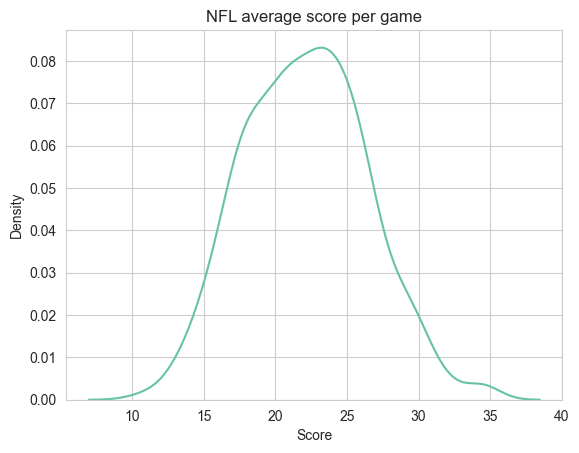

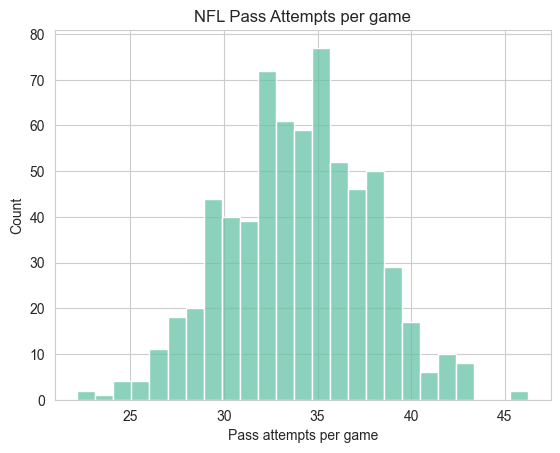

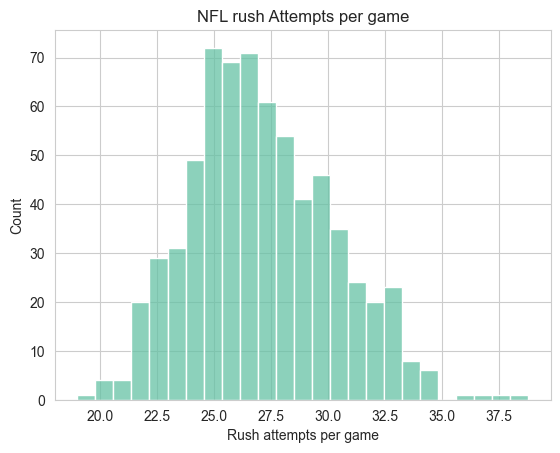

In [11]:
sns.kdeplot(yearly_stats_df, x="score")
plt.xlabel("Score")
plt.title("NFL average score per game")
plt.show()

sns.histplot(yearly_stats_df, x="pass_attempt", bins=25)
plt.xlabel("Pass attempts per game")
plt.title("NFL Pass Attempts per game")
plt.show()

sns.histplot(yearly_stats_df, x="rushing_attempts", bins=25)
plt.xlabel("Rush attempts per game")
plt.title("NFL rush Attempts per game")
plt.show()



Yard and score changes over years

Text(0, 0.5, 'Points Per Game')

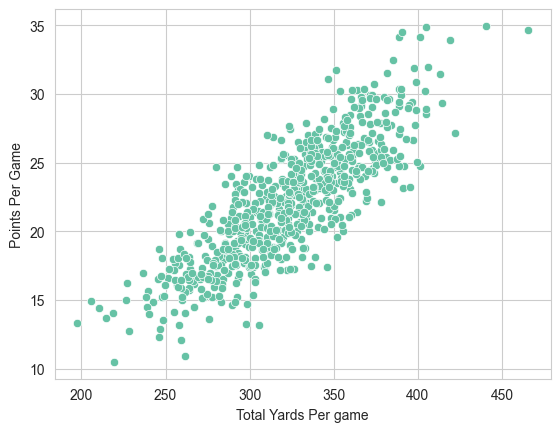

In [12]:
sns.scatterplot(yearly_stats_df, x="total_yards", y="score")
plt.xlabel("Total Yards Per game")
plt.ylabel("Points Per Game")

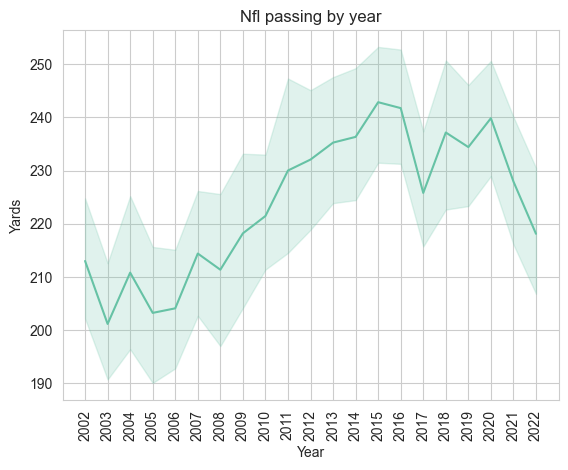

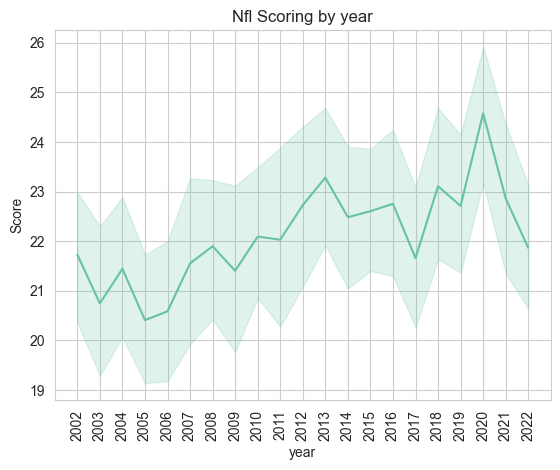

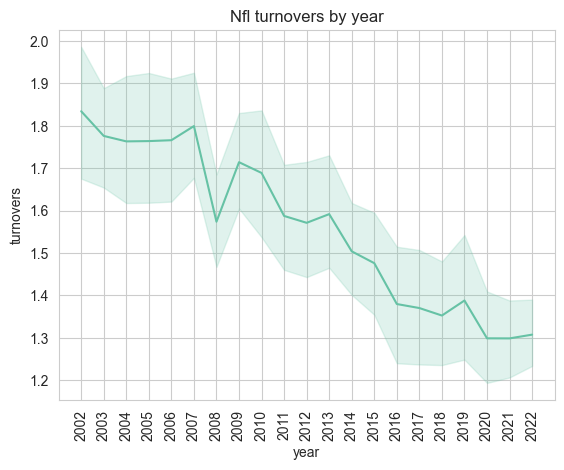

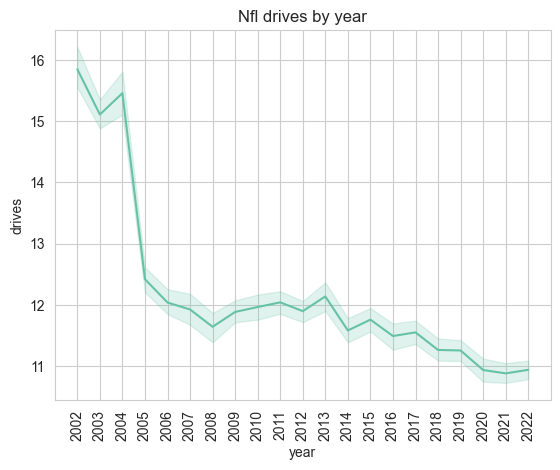

In [13]:
sns.lineplot(yearly_stats_df, x="year", y="passing_yards")
plt.xticks(rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Yards")
plt.title("Nfl passing by year")
plt.show()

sns.lineplot(yearly_stats_df, x="year", y="score")
plt.xticks(rotation="vertical")
plt.ylabel("Score")
plt.title("Nfl Scoring by year")
plt.show()

sns.lineplot(yearly_stats_df, x="year", y="turnovers")
plt.xticks(rotation="vertical")
plt.ylabel("turnovers")
plt.title("Nfl turnovers by year")
plt.show()


#drive numbers before 2005 seem to be incorrect
sns.lineplot(yearly_stats_df, x="year", y="drives")
plt.xticks(rotation="vertical")
plt.ylabel("drives")
plt.title("Nfl drives by year")
plt.show()

c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


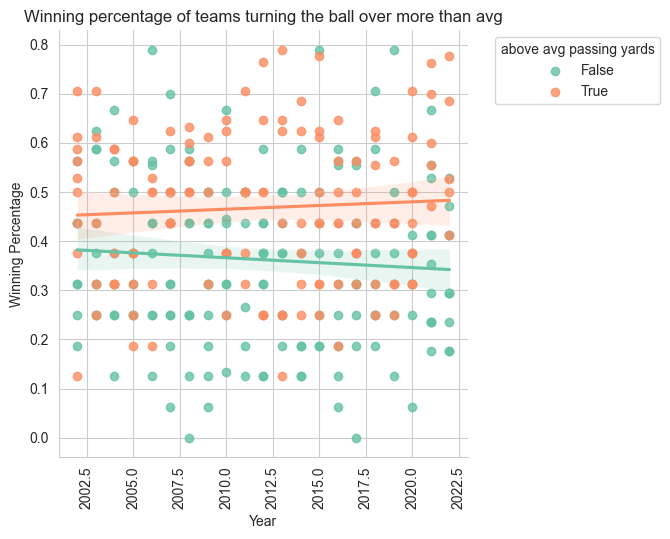

In [14]:
data_avg = yearly_stats_df.groupby('year')[['turnovers', "passing_yards"]].mean().rename(columns={"turnovers": "avg_to", "passing_yards": "avg_passing"}).reset_index()
query = pd.merge(yearly_stats_df, data_avg, on="year").query("turnovers > avg_to").copy()

query["above_passing"] = query["passing_yards"] > query["avg_passing"]
query['year'] = query['year'].astype(int)

sns.lmplot(query, x="year", y="won", hue="above_passing", legend=False)
plt.title("Winning percentage of teams turning the ball over more than avg")
plt.xlabel("Year")
plt.ylabel("Winning Percentage")
plt.legend(title="above avg passing yards", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation="vertical")
plt.show()


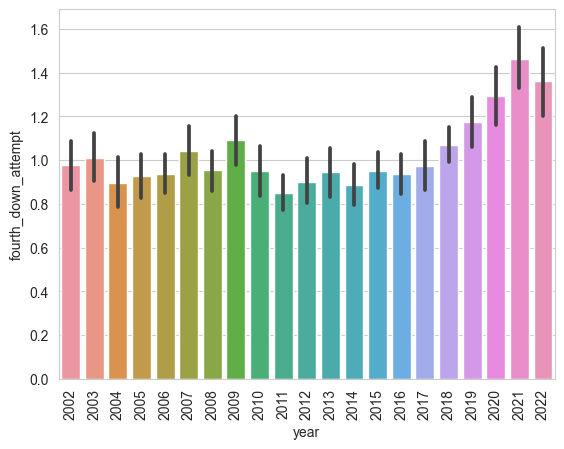

In [15]:
sns.barplot(yearly_stats_df, x="year", y="fourth_down_attempt")
plt.xticks(rotation="vertical")
plt.show()



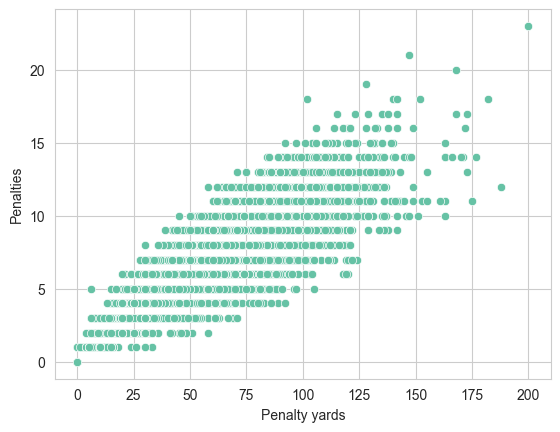

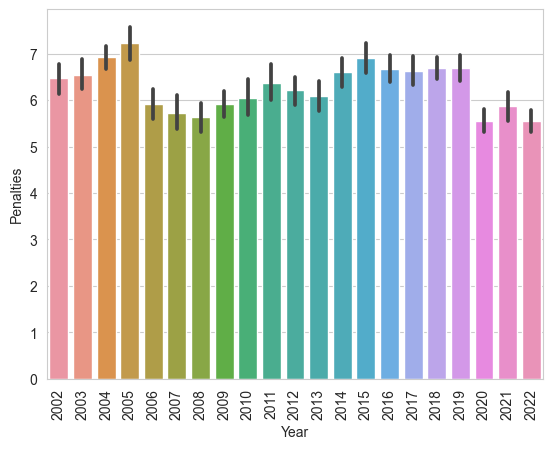

In [16]:
#are less penalized games more likey to result in sacks

sns.scatterplot(weekly_stats_df, y="penalties", x="penalty_yards")
plt.xlabel("Penalty yards")
plt.ylabel("Penalties")
plt.show()

sns.barplot(yearly_stats_df, y="penalties", x="year")
plt.xlabel("Year")
plt.ylabel("Penalties")
plt.xticks(rotation="vertical")
plt.show()

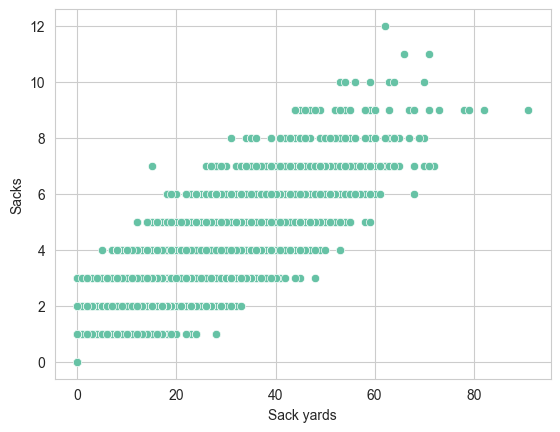

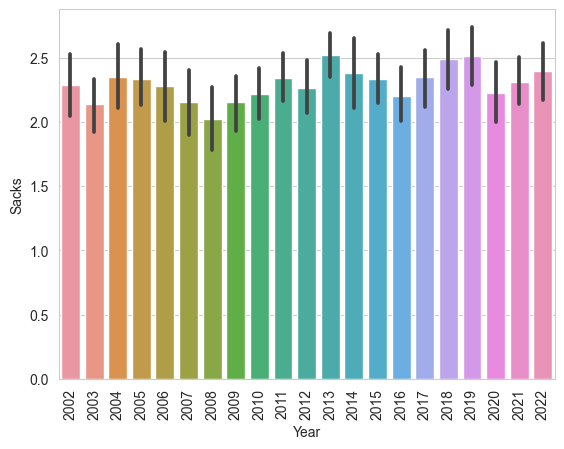

In [17]:
sns.scatterplot(weekly_stats_df, y="sacks", x="sack_yards")
plt.xlabel("Sack yards")
plt.ylabel("Sacks")
plt.show()

sns.barplot(yearly_stats_df, y="sacks", x="year")
plt.xlabel("Year")
plt.ylabel("Sacks")
plt.xticks(rotation="vertical")
plt.show()

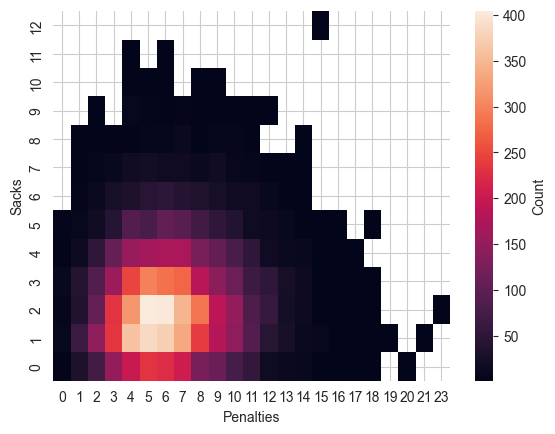

In [18]:
data = weekly_stats_df.pivot_table(index='sacks', columns='penalties', values="team", aggfunc='count')

g = sns.heatmap(data, cbar_kws=dict(label='Count'))
g.invert_yaxis()
plt.xlabel("Penalties")
plt.ylabel("Sacks")
plt.show()

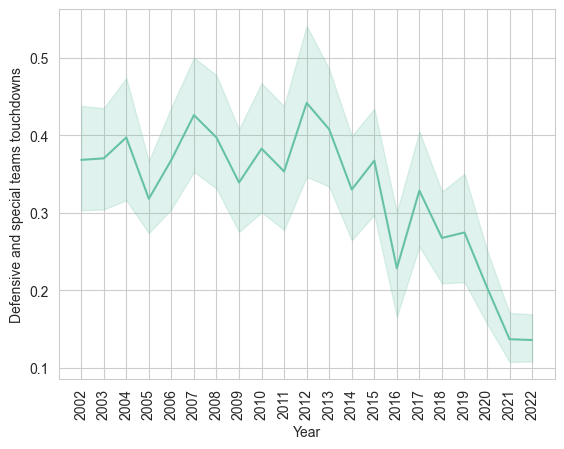

In [19]:
sns.lineplot(yearly_stats_df, x="year", y="def_st_td")
plt.xticks(rotation="vertical")
plt.xlabel("Year")
plt.ylabel("Defensive and special teams touchdowns")
plt.show()